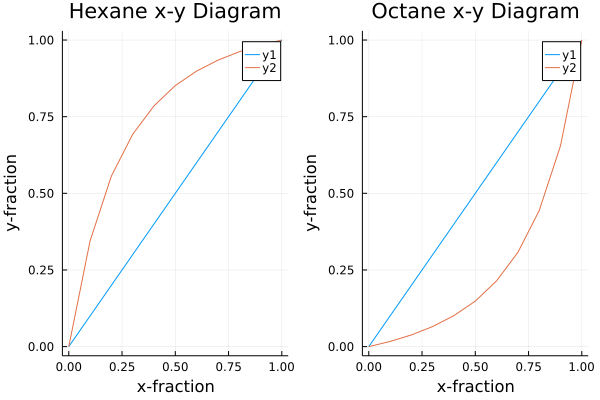

In [16]:
### Problem 1a ###

using NLsolve, ModelingToolkit, Plots
P = 760
Ahex = 15.8366
Bhex = 2697.55
Chex = -48.78
AOct = 15.9426
BOct = 3120.29
COct = -63.63
x1 = [0:0.1:1;]
x2 = 1 .-x1;

Psat1 = zero(x1)
Psat2 = zero(x1)
Pbubble = zero(x1)
TVector = zero(x1)
y1 = zero(x1)
y2 = zero(x1)
ii= 1

for value in x1
    T = 273
    while (P-Pbubble[ii]) > 1e-16
        Pbubble[ii] = x1[ii].*(exp((Ahex - (Bhex/(T + Chex))))) + x2[ii].*(exp((AOct - (BOct/(T + COct)))))
        T += 1
    
    TVector[ii] = T
    Psat1[ii] = exp((Ahex .- (Bhex ./(TVector[ii] .+ Chex))))
    Psat2[ii] = exp((AOct .- (BOct ./(TVector[ii] .+ COct))))
    y1[ii] =  (Psat1[ii].*x1[ii])./(x1[ii].*(exp((Ahex - (Bhex/(T + Chex))))) + x2[ii].*(exp((AOct - (BOct/(T + COct))))))
    y2[ii] =  (Psat2[ii].*x2[ii])./(x1[ii].*(exp((Ahex - (Bhex/(T + Chex))))) + x2[ii].*(exp((AOct - (BOct/(T + COct))))))
    end
    ii += 1
end
plot1 = plot(x1,[x1,y1], title = "Hexane x-y Diagram",xlabel= "x-fraction",ylabel ="y-fraction")
plot2 = plot(x2,[x2,y2],title = "Octane x-y Diagram",xlabel= "x-fraction",ylabel ="y-fraction")
plot(plot1,plot2)

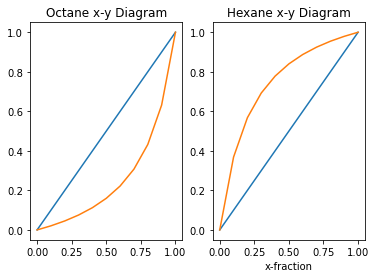

In [3]:
### Problem 2b ###
import numpy as np
import matplotlib.pyplot as plt
T = 373.15
Ahex = 15.8366
Bhex = 2697.55
Chex = -48.78
AOct = 15.9426
BOct = 3120.29
COct = -63.63
Psat1 = (np.exp(Ahex - (Bhex/(T + Chex))))
Psat2 = (np.exp(AOct - (BOct/(T + COct))))

x1 = np.arange(0,1.1,0.1)
x2 = 1-x1

Pbubble = [0]*len(x1)
ii = 0
for value in x1:
    Pbubble[ii] = (x1[ii]*Psat1) + ((x2[ii])*Psat2)
    ii += 1
Pbubble[0] = Psat2
Pbubble[-1] = Psat1

y1 = [0]*len(x1)
y2 = [0]*len(x1)
ii = 0
for value in y1:
    y1[ii] = Psat1*x1[ii]/Pbubble[ii]
    y2[ii] = 1-y1[ii]
    ii += 1
Pdew = [0]*len(x1)
ii = 0
for value in y1:
    Pdew[ii] = 1/((y1[ii]/Psat1) + (y2[ii]/Psat2))
    ii += 1

plt.subplot(1,2,2)    
plt.plot(x1,x1)
plt.plot(x1,y1)
plt.title("Hexane x-y Diagram")
plt.xlabel("x-fraction")

plt.subplot(1,2,1)
plt.plot(x2,x2)
plt.plot(x2,y2)
plt.title("Octane x-y Diagram")

plt.show()

In [ ]:
### Problem 3 ###